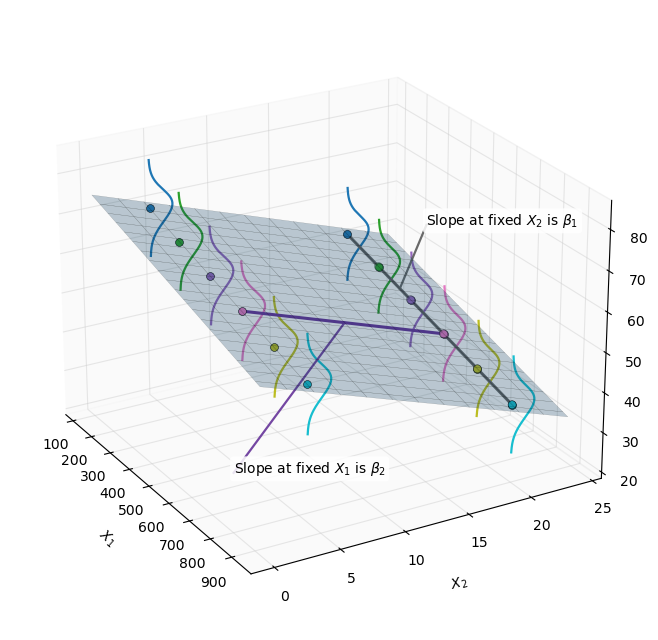

In [132]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# --------------------------
# Generic or example labels?
# --------------------------
USE_EXAMPLE_LABELS = False  # set True to show Light/Time/Flowers labels

# --------------------------
# Model & ranges
# Y = b0 + b1*X1 + b2*X2
# --------------------------
b0, b1, b2 = 78.0, -0.020, -1.10

x1_vals = np.array([150, 300, 450, 600, 750, 900])  # positions along X1
x2_rows = np.array([4, 20])                         # two levels of X2

# Mesh for regression plane
x1_mesh = np.linspace(120, 930, 40)
x2_mesh = np.linspace(0, 24, 25)
X1, X2 = np.meshgrid(x1_mesh, x2_mesh)
Y = b0 + b1*X1 + b2*X2

fig = plt.figure(figsize=(7.0, 6.5))
ax = fig.add_subplot(111, projection="3d")

# Regression plane
ax.plot_surface(X1, X2, Y, rstride=2, cstride=2, alpha=0.28,
                edgecolor="k", linewidth=0.2)

# Colors for bells/dots (match by X1 position)
cmap = colormaps.get_cmap("tab10")
N = len(x1_vals)
colors = [cmap(i / (N - 1)) for i in range(N)]

# Bells (one-sided) + mean dots
sigma = 4.0
bell_halfwidth = 1.8
def bell_curve(y, mu, sd):
    dens = np.exp(-0.5 * ((y - mu) / sd) ** 2)
    return bell_halfwidth * (dens / dens.max())

for x2_base in x2_rows:
    for k, x1 in enumerate(x1_vals):
        mu = b0 + b1*x1 + b2*x2_base
        y = np.linspace(mu - 12, mu + 12, 160)
        w = bell_curve(y, mu, sigma)
        ax.plot(np.full_like(y, x1), x2_base + w, y, lw=1.6, color=colors[k])
        ax.scatter([x1], [x2_base], [mu], s=32, depthshade=False,
                   color=colors[k], edgecolor="k", linewidth=0.4)

# Back‑row means line + markers
x2_back = x2_rows.max()
y_back = b0 + b1*x1_vals + b2*x2_back
ax.plot(x1_vals, np.full_like(x1_vals, x2_back), y_back,
        lw=2.2, color="dimgray")
ax.scatter(x1_vals, np.full_like(x1_vals, x2_back), y_back, s=34,
           color=colors, edgecolor="k", linewidth=0.4)

# Connector for β2 at a fixed X1 (X2 effect holding X1 fixed)
x1_pick_idx = 3
x1_pick = x1_vals[x1_pick_idx]
y_row1 = b0 + b1*x1_pick + b2*x2_rows[0]
y_row2 = b0 + b1*x1_pick + b2*x2_rows[1]
ax.plot([x1_pick, x1_pick], [x2_rows[0], x2_rows[1]], [y_row1, y_row2],
        lw=2.2, color="rebeccapurple")

# ----- Labels & pointer lines (after dependencies are defined) -----
# β2 label -> midpoint of connector
beta2_target = (x1_pick, np.mean(x2_rows), np.mean([y_row1, y_row2]))
beta2_text   = (x1_pick + 15, np.mean(x2_rows) - 9, beta2_target[2] - 30)
ax.plot([beta2_text[0], beta2_target[0]],
        [beta2_text[1], beta2_target[1]],
        [beta2_text[2], beta2_target[2]],
        color="rebeccapurple", lw=1.6, alpha=0.9)
ax.text3D(*beta2_text, r"Slope at fixed $X_1$ is $\beta_2$",
          bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="none", alpha=0.85))

# β1 label -> a mid‑segment on the back row
x1_mid = 400
y_mid  = b0 + b1*x1_mid + b2*x2_back
beta1_target = (x1_mid, x2_back, y_mid)
beta1_text   = (x1_mid - 100, x2_back + 4.0, y_mid + 10)
ax.plot([beta1_text[0], beta1_target[0]],
        [beta1_text[1], beta1_target[1]],
        [beta1_text[2], beta1_target[2]],
        color="dimgray", lw=1.6, alpha=1)
ax.text3D(*beta1_text, r"Slope at fixed $X_2$ is $\beta_1$",
          bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="none", alpha=0.85))

# Styling: pale panes & grid
pale = (0.97, 0.97, 0.97, 1.0)
for pane in (ax.xaxis.pane, ax.yaxis.pane, ax.zaxis.pane):
    pane.set_facecolor(pale)
grid_color = (0.80, 0.80, 0.80, 0.45)
for axis in (ax.xaxis, ax.yaxis, ax.zaxis):
    axis._axinfo['grid']['color'] = grid_color
fig.patch.set_facecolor((1, 1, 1, 1))

# Axis labels (generic vs example)
if USE_EXAMPLE_LABELS:
    ax.set_xlabel(r"$X_1$ = Light Intensity ($\mu mol/m^2/s$)", labelpad=10)
    ax.set_ylabel(r"$X_2$ = Time (days)", labelpad=10)
    ax.set_zlabel(r"$Y$ = Flowers per Plant", labelpad=10)
else:
    ax.set_xlabel(r"$X_1$", labelpad=10)
    ax.set_ylabel(r"$X_2$", labelpad=10)
    ax.set_zlabel(r"$Y$", labelpad=10)

ax.view_init(elev=24, azim=-30)
plt.tight_layout()

os.makedirs("../images", exist_ok=True)
plt.savefig("../images/fch11_regression_plane_plot.png", dpi=300)
plt.show()


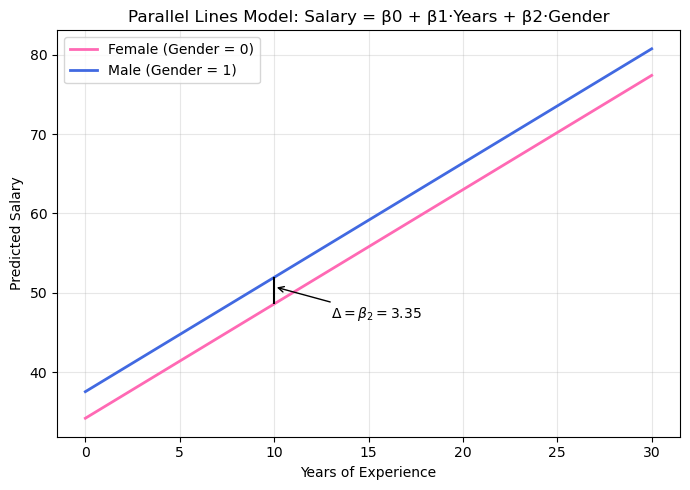

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Coefficients
beta0 = 34.19   # intercept
beta1 = 1.44    # slope for Years
beta2 = 3.35    # intercept shift for Gender=1 (Male)

# Range for Years
years = np.linspace(0, 30, 200)

# Predicted salary lines
salary_female = beta0 + beta1 * years            # Gender = 0
salary_male   = (beta0 + beta2) + beta1 * years  # Gender = 1

# Plot
plt.figure(figsize=(7,5))
plt.plot(years, salary_female, label="Female (Gender = 0)", color="hotpink", linewidth=2)
plt.plot(years, salary_male, label="Male (Gender = 1)", color="royalblue", linewidth=2)

# Annotate the vertical difference at x = 10 years
x0 = 10
y_f = beta0 + beta1 * x0
y_m = (beta0 + beta2) + beta1 * x0

plt.vlines(x=x0, ymin=y_f, ymax=y_m, linestyles="solid", color="black", linewidth=1.5)

# Add annotation with arrow
plt.annotate(r"$\Delta = \beta_2 = 3.35$",
             xy=(x0, ((y_f + y_m) / 2) + 0.5),
             xytext=(x0 + 3, (y_f + y_m) / 2 - 3),
             arrowprops=dict(arrowstyle="->", color="black"),
             fontsize=10, va="center")

plt.xlabel("Years of Experience")
plt.ylabel("Predicted Salary")
plt.title("Parallel Lines Model: Salary = β0 + β1·Years + β2·Gender")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig("gender_salary_years_lines.png", dpi=200)
plt.show()


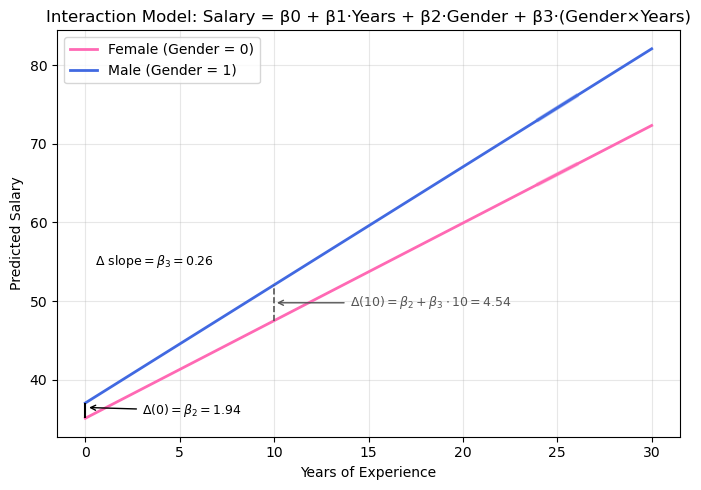

In [105]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Coefficients (from your notes)
beta0 = 35.12           # intercept
beta1 = 1.24            # slope for Years (female baseline)
beta2 = 1.94            # intercept shift for Gender=1 (male)
beta3 = 0.26            # slope shift for Gender=1 (male)

# Range for Years (adjust as needed)
years = np.linspace(0, 30, 300)

# Predicted salary lines
salary_female = beta0 + beta1 * years
salary_male   = (beta0 + beta2) + (beta1 + beta3) * years

# Plot
plt.figure(figsize=(7,5))
plt.plot(years, salary_female, label="Female (Gender = 0)", color="hotpink", linewidth=2)
plt.plot(years, salary_male,   label="Male (Gender = 1)",   color="royalblue", linewidth=2)

# Intercept difference at Years = 0
y_f_0 = beta0
y_m_0 = beta0 + beta2
plt.vlines(x=0, ymin=y_f_0, ymax=y_m_0, colors="black", linewidth=1.5)
# plt.text(0.5, (y_f_0 + y_m_0)/2 + 0.4, r"$\Delta(0)=\beta_2=1.94$", fontsize=9, va="center")
plt.annotate(fr"$\Delta(0) = \beta_2 = 1.94$",
             xy=(0.05, (y_f_0 + y_m_0)/2 + 0.4), xytext=(3, (y_f_0 + y_m_0)/2),
             arrowprops=dict(arrowstyle="->", color="black"), fontsize=9, va="center", color="black")

# Vertical difference at a fixed Years value (e.g., 10)
x0 = 10
y_f = beta0 + beta1 * x0
y_m = (beta0 + beta2) + (beta1 + beta3) * x0
delta_x0 = beta2 + beta3 * x0
plt.vlines(x=x0, ymin=y_f, ymax=y_m, colors="#555555", linestyles="dashed", linewidth=1.2)
plt.annotate(fr"$\Delta({x0}) = \beta_2 + \beta_3 \cdot {x0} = {delta_x0:.2f}$",
             xy=(x0, (y_f + y_m)/2), xytext=(x0+4, (y_f + y_m)/2),
             arrowprops=dict(arrowstyle="->", color="#555555"), fontsize=9, va="center", color="#555555")

# Slope difference annotation
# Draw a small guide segment near x=25 to label Δ slope = β3
x1, x2 = 24, 26
seg_f = (beta0 + beta1*np.array([x1, x2]))
seg_m = (beta0 + beta2) + (beta1 + beta3)*np.array([x1, x2])
plt.plot([x1, x2], seg_f, color="hotpink", lw=3, alpha=0.4)
plt.plot([x1, x2], seg_m, color="royalblue", lw=3, alpha=0.4)
mid_y = (seg_f.mean() + seg_m.mean())/2
plt.text(0.5, 55, r"$\Delta\ \text{slope} = \beta_3 = 0.26$", fontsize=9, va="center")
# plt.text(x2+0.5, mid_y-10,
#          r"$\Delta\ \text{slope} = $" + "\n" + r"$\beta_3 = 0.26$",
#          fontsize=9, va="center")


plt.xlabel("Years of Experience")
plt.ylabel("Predicted Salary")
plt.title("Interaction Model: Salary = β0 + β1·Years + β2·Gender + β3·(Gender×Years)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig("../images/gender_salary_years_interaction.png", dpi=200)
plt.show()
